# SC1015 DSAI Mini Project
## Part 5: Data Driven Insights & Conclusion
---
This is the final section of our project. Here, we re-combine our variables related to success and variables related to conventionality to see if there are any differences between outliers and non-outliers. We perform a comparative Exploratory Data Analysis on the outliers vs. non-outliers to see if we can infer anything from the similarities and differences. This is the section where we answer our question.

<br>
<details>
    <summary>
        <strong><a>(Warning: Spoiler) Click here for Conclusion</a></strong>
    </summary> 
    Based on our dataset and the analysis and exploration we have done with it, we conclude that unconventionality might NOT be an indicator of success
</details>

**Question:** Does Being Unconventional Determine Success?

**Dataset:** [Stack Overflow Developer Survey 2020 on Kaggle](https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020)

## Table of Contents:
1. [Seperating the Outliers and Non-outliers](#1\.-Seperating-the-Outliers-and-Non-outliers)
2. [Comparing `ConvertedComp`](#2\.-Comparing-ConvertedComp)
3. [Comparing `JobSat`](#3\.-Comparing-JobSat)
4. [Relationships between `JobSat` and `ConvertedComp`](#4\.-Relationships-between-JobSat-and-ConvertedComp)

In [4]:
#Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

### 1. Seperating the Outliers and Non-outliers

In [5]:
#Variables to determine success
successVars = pd.read_pickle('success_vars_data.pickle')
successVars

,ConvertedComp,JobSat
0,116000.0,1
1,32315.0,4
2,40070.0,1
3,66000.0,2
4,83400.0,1
...,...,...
19357,2000000.0,0
19358,75396.0,4
19359,2508.0,4
19360,70000.0,4


In [6]:
#Cluster groupings
clusters = pd.read_pickle('conv_vars_clustered.pickle')
clusters

,Cluster
0,2
1,1
2,-1
3,1
4,1
...,...
19357,-1
19358,-1
19359,1
19360,0


In [7]:
#Combining both dataframes
clusteredVars=clusters.join(successVars)
clusteredVars

,Cluster,ConvertedComp,JobSat
0,2,116000.0,1
1,1,32315.0,4
2,-1,40070.0,1
3,1,66000.0,2
4,1,83400.0,1
...,...,...,...
19357,-1,2000000.0,0
19358,-1,75396.0,4
19359,1,2508.0,4
19360,0,70000.0,4


In [8]:
clusteredVars.dtypes

Cluster            int64
ConvertedComp    float64
JobSat             int64
dtype: object

In [9]:
#Extracting outliers
outliers = clusteredVars.loc[clusteredVars['Cluster']==-1]
outliers

,Cluster,ConvertedComp,JobSat
2,-1,40070.0,1
6,-1,63564.0,1
12,-1,36753.0,4
13,-1,74970.0,4
15,-1,16488.0,2
...,...,...,...
19351,-1,2000000.0,0
19354,-1,19104.0,2
19356,-1,200000.0,4
19357,-1,2000000.0,0


In [10]:
#Extracting non-outliers
nonOutliers = clusteredVars.loc[clusteredVars['Cluster']!=-1]
nonOutliers

,Cluster,ConvertedComp,JobSat
0,2,116000.0,1
1,1,32315.0,4
3,1,66000.0,2
4,1,83400.0,1
5,1,38778.0,1
...,...,...,...
19353,0,11544.0,4
19355,1,100000.0,2
19359,1,2508.0,4
19360,0,70000.0,4


There is an imbalance in the sample size between the outlier (6206 datapoints) and non-outlier (13156 datapoints) group. 

Thus, it is important to note that frequency comparisons between these groups have to be in a moderated form, such as percentage. 

### 2. Comparing `ConvertedComp`
Let's compare the distribution in ConvertedComp between the outlier and non-outlier groups 

A summary of the distribution characteristics

In [11]:
#Combine both groups for histogram
combined_cc= pd.DataFrame({'Outliers': outliers['ConvertedComp'],
                                'Non-outliers': nonOutliers['ConvertedComp']})
combined_cc.describe()

,Outliers,Non-outliers
count,6.206000e+03,1.315600e+04
mean,1.128241e+05,1.015305e+05
std,2.495036e+05,2.262948e+05
min,0.000000e+00,0.000000e+00
25%,2.500000e+04,2.491200e+04
50%,5.577600e+04,5.395700e+04
75%,1.026930e+05,9.250000e+04
max,2.000000e+06,2.000000e+06


<AxesSubplot:>

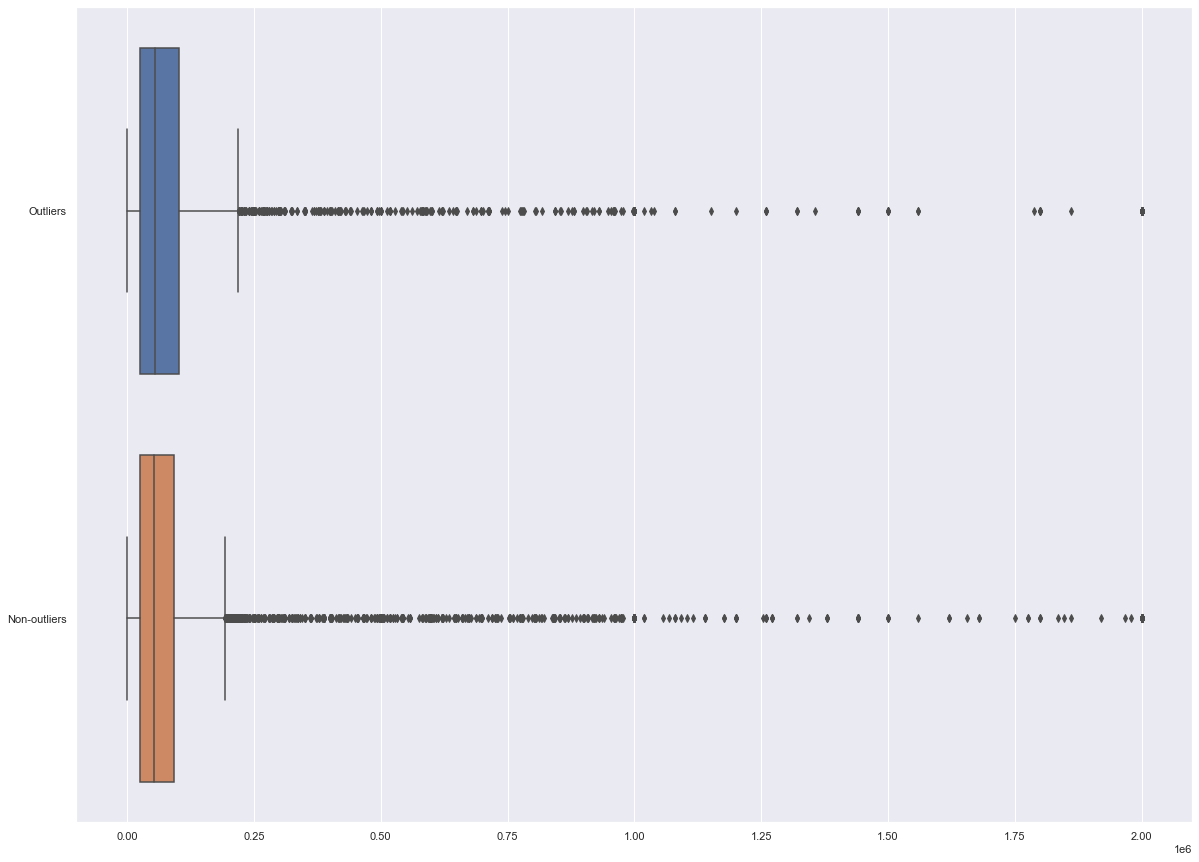

In [12]:
#Boxplot comparison
f, axes = plt.subplots(figsize=(20,15))
sb.boxplot(data=combined_cc, orient='h')

Since boxplots hide the actual distribution, let's use histogram plots to analyse the distribution of data.

Note that the y-axis of the histograms represent the percentage frequency of the data and not the actual count.

<AxesSubplot:xlabel='ConvertedComp', ylabel='Percent'>

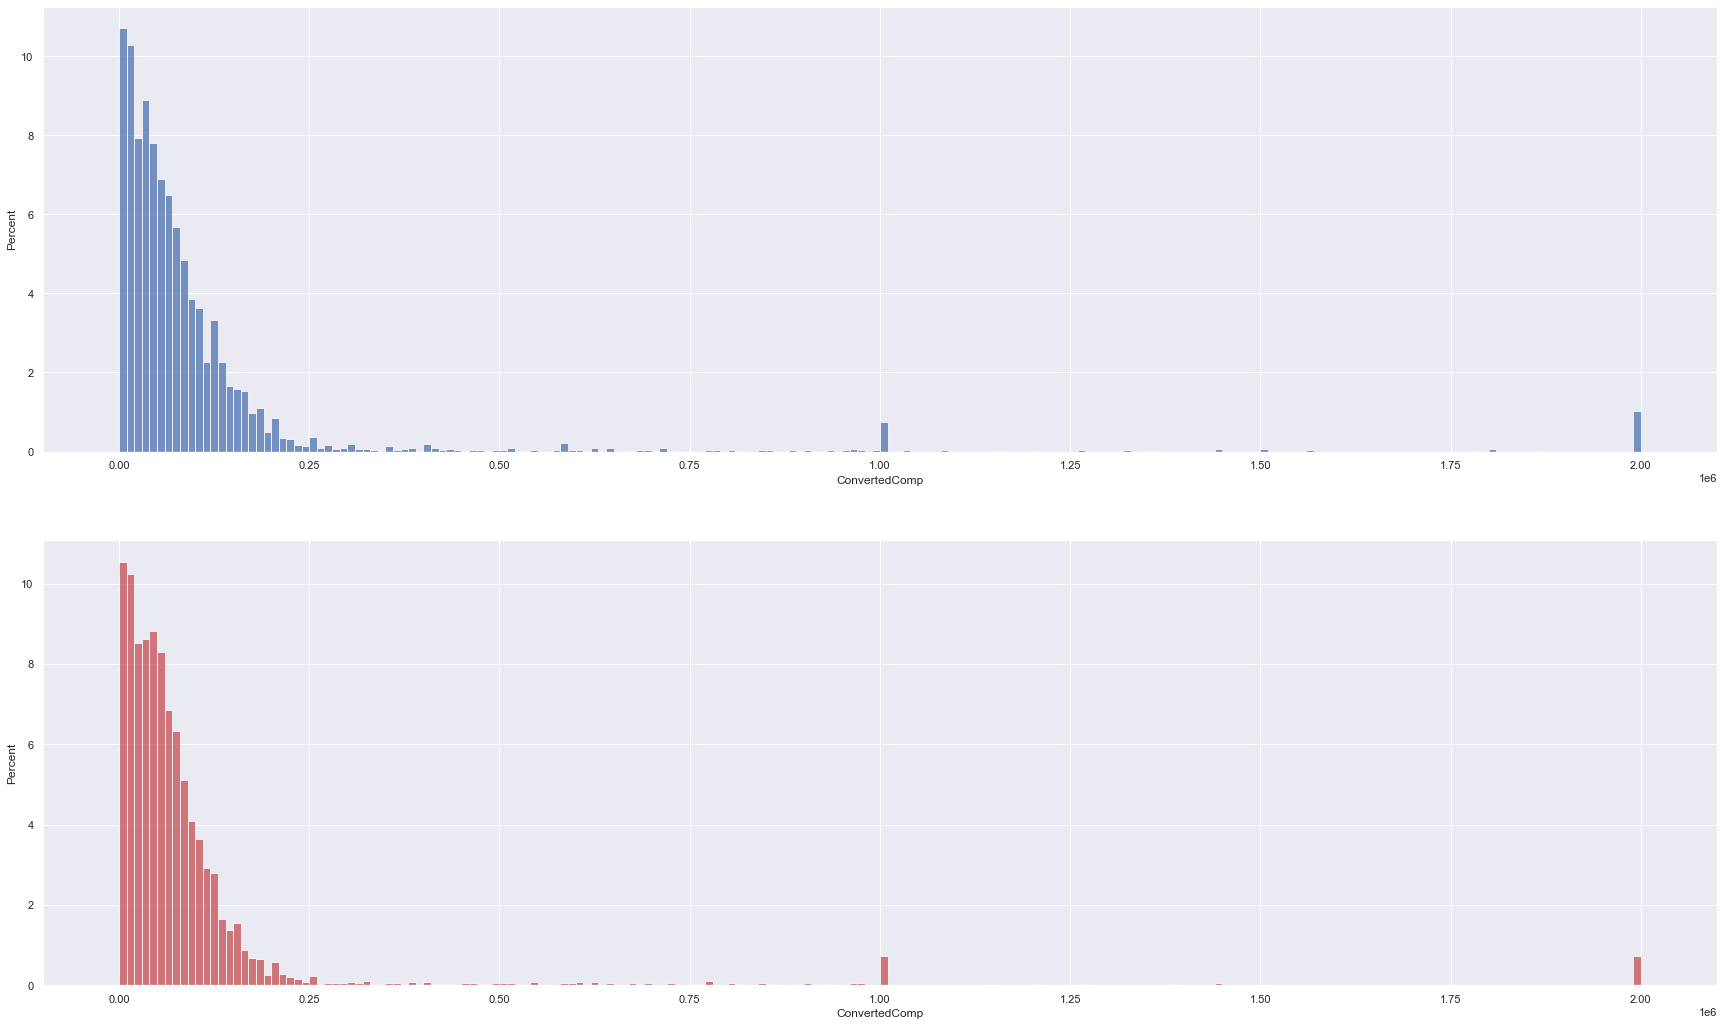

In [41]:
#Seperate histogram plot
fig, ax= plt.subplots(2,1,figsize=(30,18))
sb.histplot(data=outliers, ax=ax[0],x='ConvertedComp', stat='percent',color='b',binwidth=1e4)
sb.histplot(data=nonOutliers, ax=ax[1],x='ConvertedComp', stat='percent',color='r',binwidth=1e4)

Overlap of the graphs:

<AxesSubplot:xlabel='ConvertedComp', ylabel='Percent'>

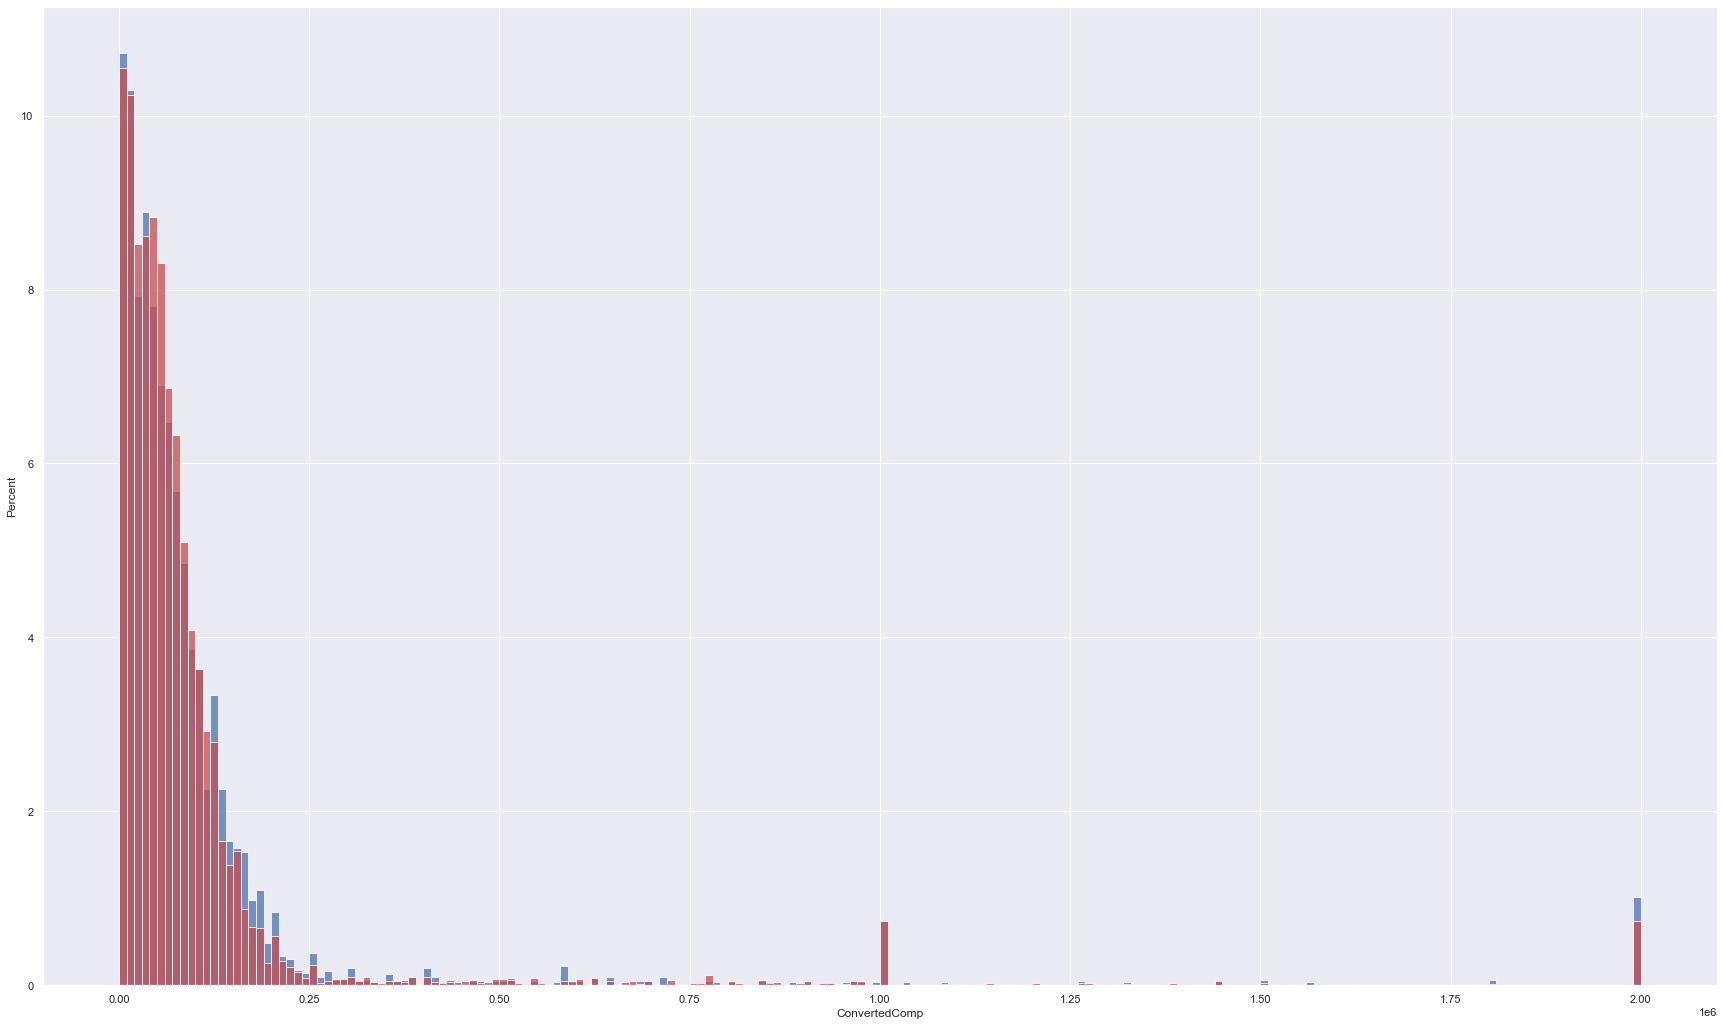

In [14]:
#Combined histogram plot
fig, ax= plt.subplots(figsize=(30,18))
sb.histplot(data=outliers, ax=ax,x='ConvertedComp', stat='percent',color='b',binwidth=1e4)
sb.histplot(data=nonOutliers, ax=ax,x='ConvertedComp', stat='percent',color='r',binwidth=1e4)

The ConvertedComp between outliers and non-outliers seem to have a similar pattern.

#### Insignificant details:

There seems to be a slightly higher percentage of non-outliers residing in the lower (0 to 0.1e6) range. 

### 3. Comparing `JobSat`

In [15]:
newClusVars=clusteredVars.copy()
newClusVars["Cluster"]=np.where(newClusVars["Cluster"]==-1,"Outlier","Non-outlier")
newClusVars.head(15)

,Cluster,ConvertedComp,JobSat
0,Non-outlier,116000.0,1
1,Non-outlier,32315.0,4
2,Outlier,40070.0,1
3,Non-outlier,66000.0,2
4,Non-outlier,83400.0,1
5,Non-outlier,38778.0,1
6,Outlier,63564.0,1
7,Non-outlier,77556.0,2
8,Non-outlier,97288.0,4
9,Non-outlier,106000.0,1


<AxesSubplot:xlabel='JobSat', ylabel='Percent'>

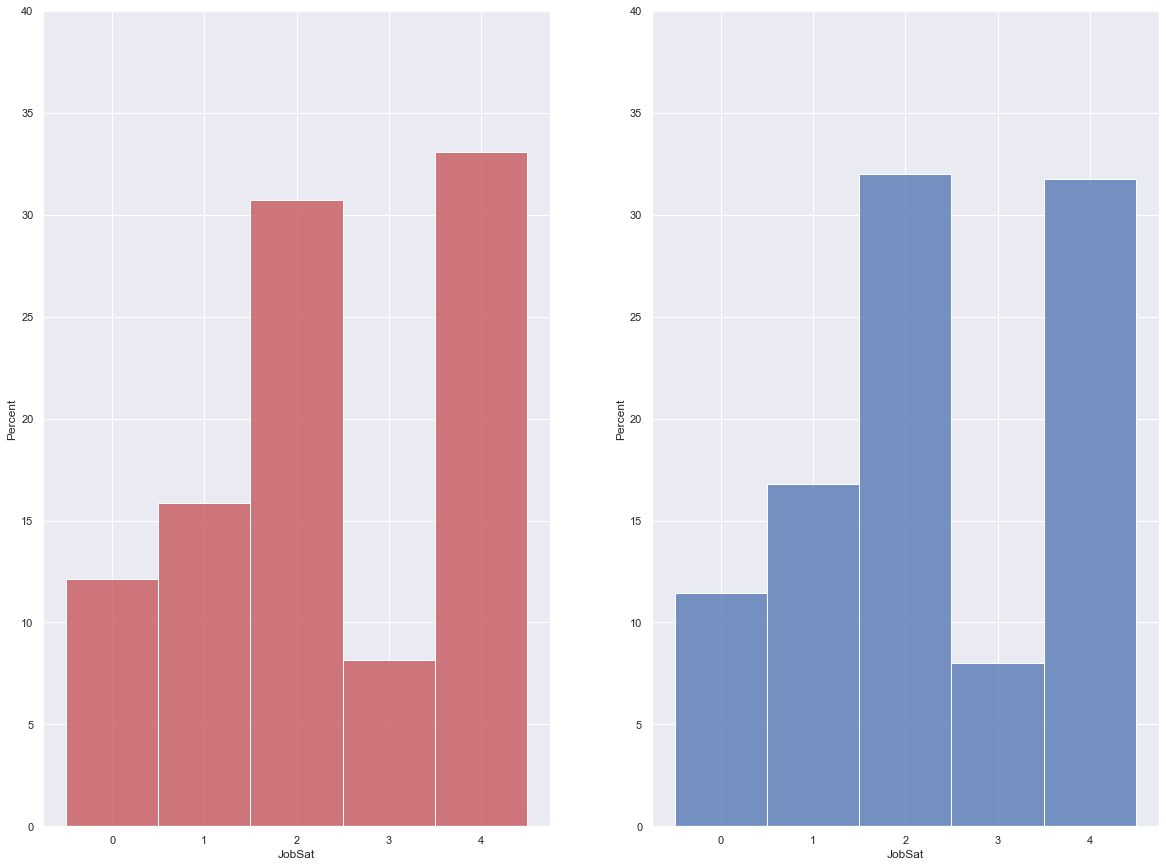

In [39]:
outliers_cpy=outliers.copy()
outliers_cpy['JobSat']=outliers_cpy['JobSat'].astype('category')
outliers_cpy.dtypes

nonOutliers_cpy=nonOutliers.copy()
nonOutliers_cpy['JobSat']=nonOutliers_cpy['JobSat'].astype('category')

fig, ax= plt.subplots(1,2, figsize=(20,15))
plt.setp(ax, ylim=(0, 40))
sb.histplot(data=outliers_cpy['JobSat'],ax=ax[0],stat='percent',color='r')
sb.histplot(data=nonOutliers_cpy['JobSat'],ax=ax[1],stat='percent',color='b')


<AxesSubplot:xlabel='JobSat', ylabel='Percent'>

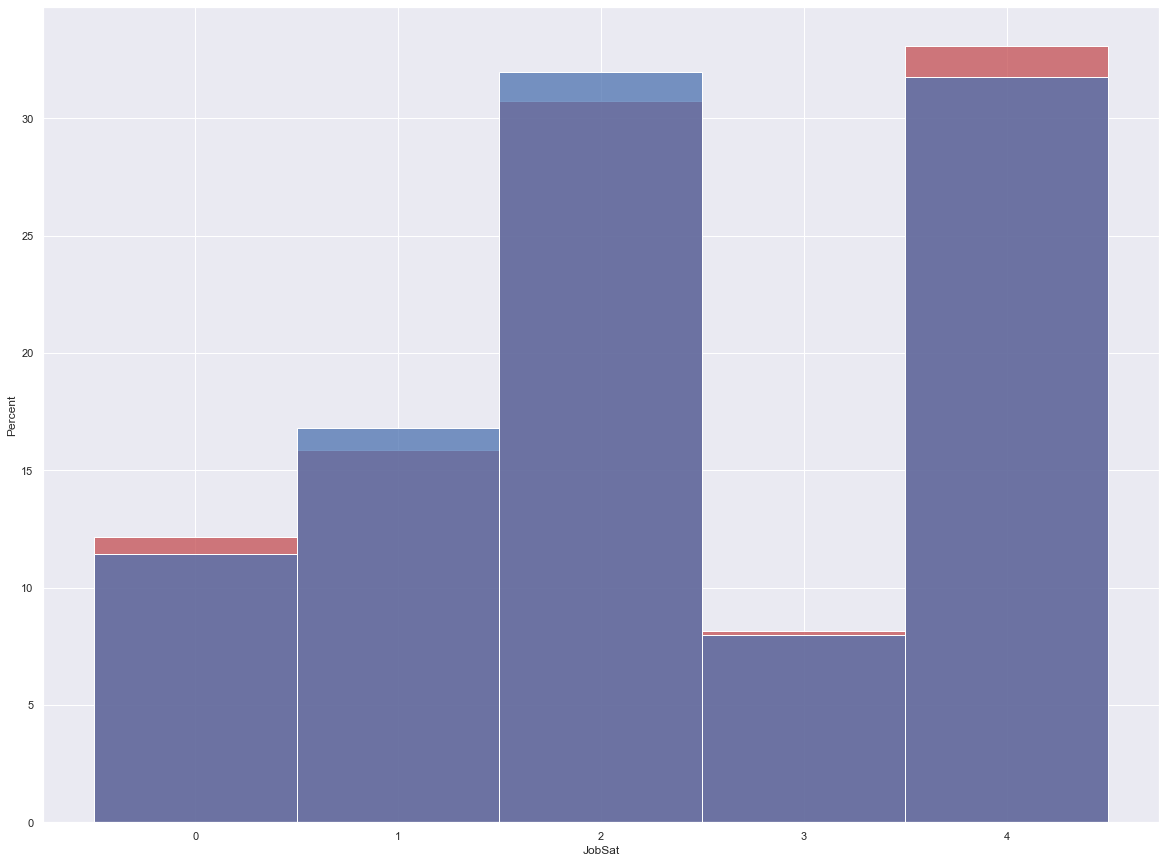

In [17]:
fig, ax= plt.subplots(figsize=(20,15))
sb.histplot(data=outliers_cpy['JobSat'],ax=ax,stat='percent',color='r')
sb.histplot(data=nonOutliers_cpy['JobSat'],ax=ax,stat='percent',color='b')

In [18]:
#Combine both groups for histogram
combined_js= pd.DataFrame({'Outliers': outliers['JobSat'],
                                'Non-outliers': nonOutliers['JobSat']})
combined_js.describe()

,Outliers,Non-outliers
count,6206.000000,13156.000000
mean,2.341766,2.318182
std,1.390547,1.369264
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,4.000000,4.000000


There seems to be a similar pattern in JobSat between the outlier and non-outlier group

#### Insignificant details:

We can see that there are slightly more frequencies in ratings at the ends of the scale (0 and 4) from the outlier group, in comparison to the non-outlier group. This could imply that respondents in the outlier groups are typically more satisfied or unsatisfied with their jobs, in comparison to respondents in the non-outlier groups.

Similarly, there are slightly more frequencies in ratings in the intermediate parts of the scale (2 and 3) from the non-outlier group.

### 4. Relationships between `JobSat` and `ConvertedComp`
Let's compare the difference in relationships between the two success variables in the outlier and non-outlier groups

#### For outlier group:

Correlation between JobSat and ConvertedComp:
                  JobSat  ConvertedComp
JobSat         1.000000       0.017618
ConvertedComp  0.017618       1.000000


<AxesSubplot:xlabel='ConvertedComp', ylabel='JobSat'>

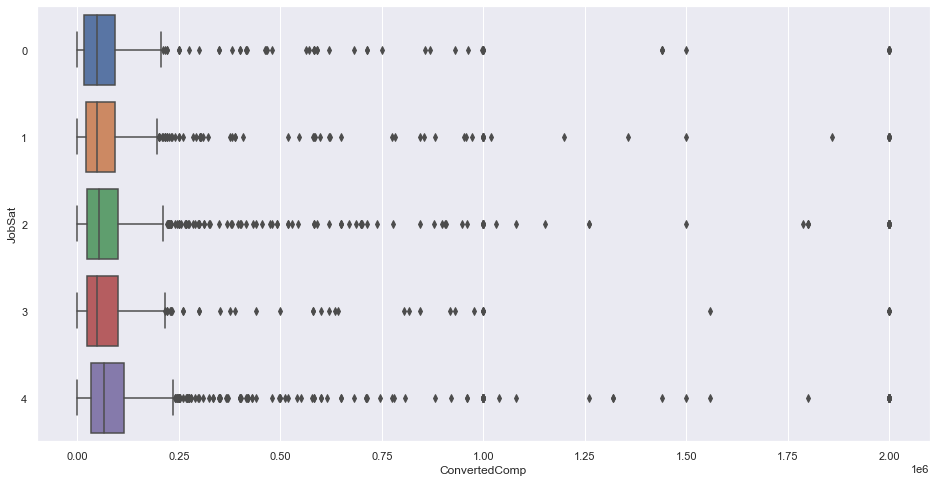

In [33]:
js_cc_out=pd.DataFrame(outliers[['JobSat','ConvertedComp']])

#Correlation
print("Correlation between JobSat and ConvertedComp:\n", js_cc_out.corr())

#Boxplot
js_cc_out['JobSat']=js_cc_out['JobSat'].astype('category')
f = plt.figure(figsize=(16,8))
sb.boxplot(data=js_cc_out, y="JobSat", x="ConvertedComp", orient = "h")


<AxesSubplot:xlabel='JobSat', ylabel='ConvertedComp'>

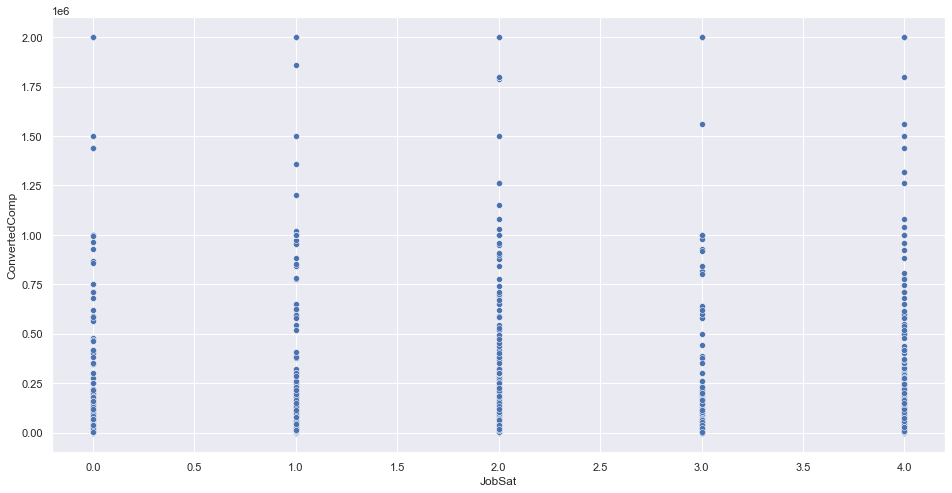

In [34]:
f = plt.figure(figsize=(16,8))
sb.scatterplot(data=js_cc_out, x="JobSat", y="ConvertedComp")

<AxesSubplot:xlabel='JobSat', ylabel='ConvertedComp'>

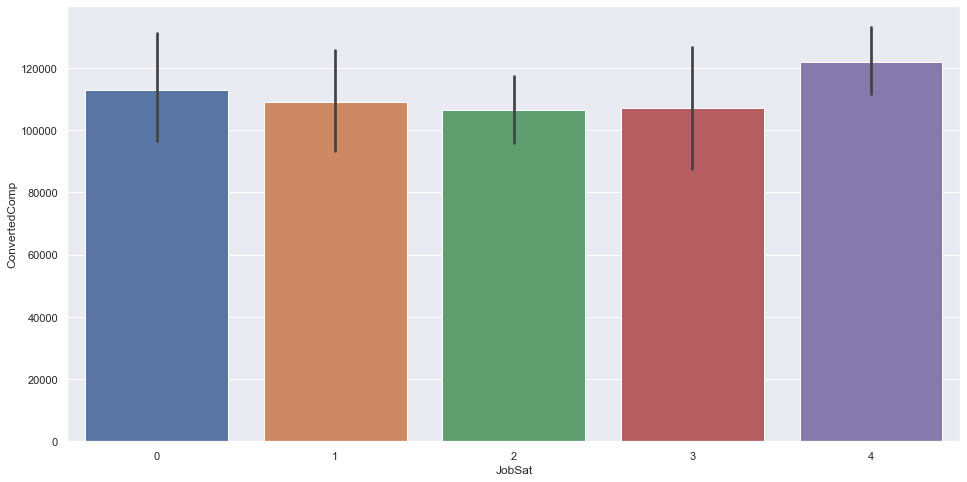

In [35]:
f = plt.figure(figsize=(16,8))
sb.barplot(data=js_cc_out, x="JobSat", y="ConvertedComp")

In the outlier group, we notice that respondents who are most satisfied with their jobs (4 on the scale) have a significantly higher ConvertedComp on average

#### For non-outlier group

Correlation between JobSat and ConvertedComp:
                  JobSat  ConvertedComp
JobSat         1.000000       0.041105
ConvertedComp  0.041105       1.000000


<AxesSubplot:xlabel='ConvertedComp', ylabel='JobSat'>

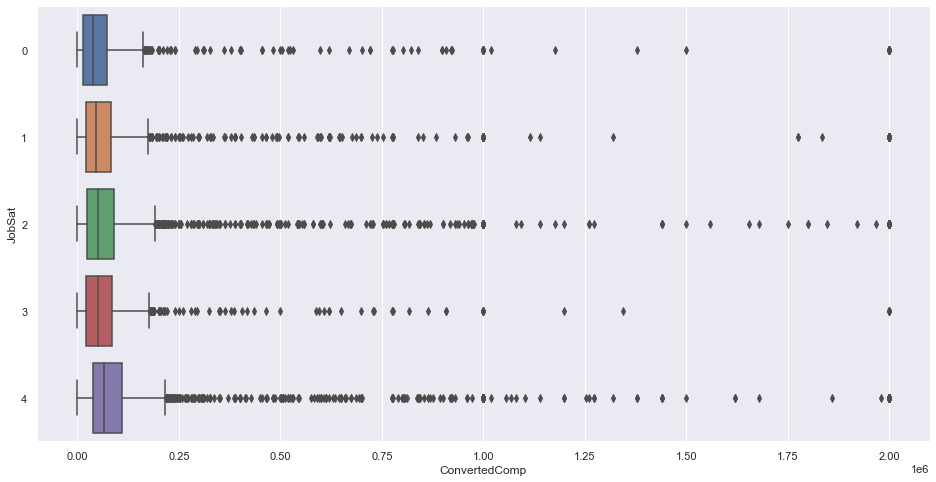

In [36]:
js_cc_Nout=pd.DataFrame(nonOutliers[['JobSat','ConvertedComp']])

#Correlation
print("Correlation between JobSat and ConvertedComp:\n", js_cc_Nout.corr())

#Boxplot
js_cc_Nout['JobSat']=js_cc_Nout['JobSat'].astype('category')
f = plt.figure(figsize=(16,8))
sb.boxplot(data=js_cc_Nout, y="JobSat", x="ConvertedComp", orient = "h")

<AxesSubplot:xlabel='JobSat', ylabel='ConvertedComp'>

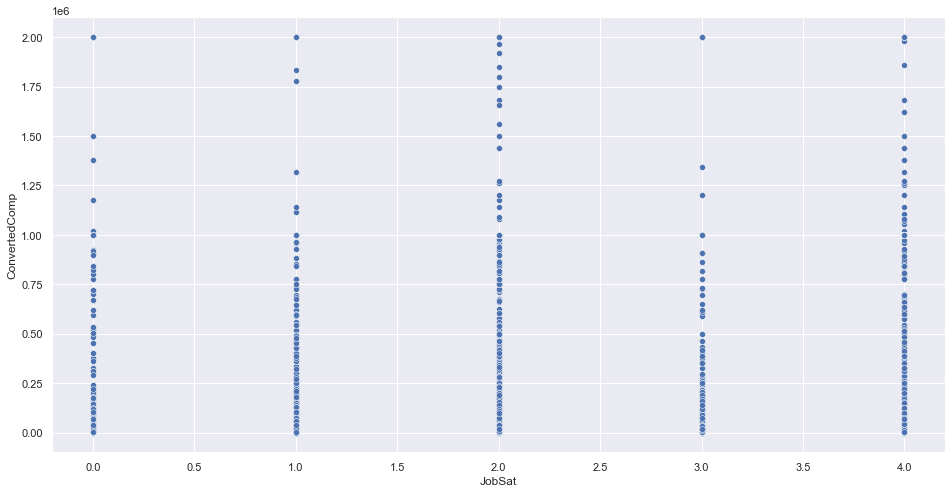

In [37]:
f = plt.figure(figsize=(16,8))
sb.scatterplot(data=js_cc_Nout, x="JobSat", y="ConvertedComp")

<AxesSubplot:xlabel='JobSat', ylabel='ConvertedComp'>

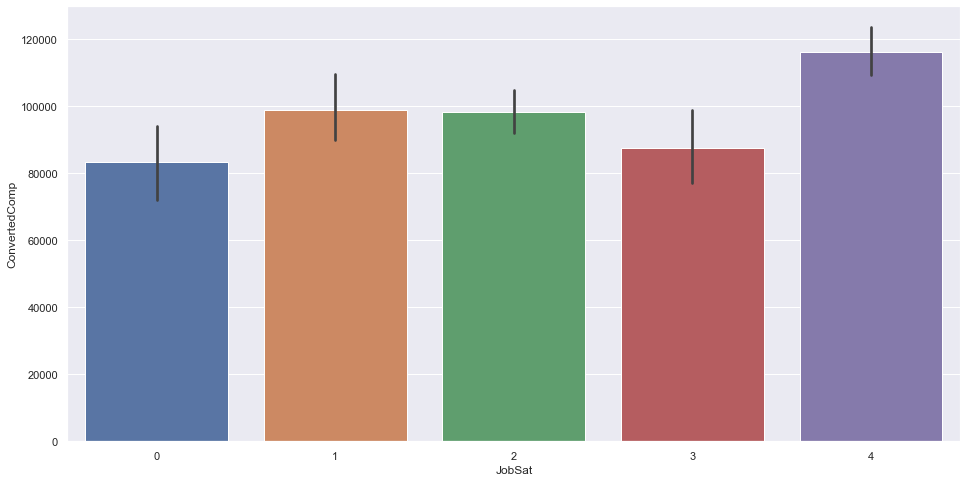

In [38]:
f = plt.figure(figsize=(16,8))
sb.barplot(data=js_cc_Nout, x="JobSat", y="ConvertedComp")

In the non-outlier group, we also notice that respondents who are most satisfied with their jobs (4 on the scale) have a significantly higher ConvertedComp on average